In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [18]:
ruta1 = r'../Yelp/reviews_parte1.csv'
ruta2 = r'../Yelp/reviews_parte2.csv'
ruta3 = r'../Yelp/reviews_parte3.csv'



In [19]:
df1 = pd.read_csv(ruta1)
df2 = pd.read_csv(ruta2)
df3 = pd.read_csv(ruta3)

In [20]:
# Concatenar a lo largo del eje de las filas
df = pd.concat([df1, df2, df3], axis=0)

In [21]:
df.head(3)

,business_id,stars,text,date
0,XQfwVwDr-v0ZS3_CbbE5Xw,3,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,YjUWPpI6HXG530lwP-fb2A,3,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,kxX2SOes4o-D3ZQBkiMRfA,5,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03


In [22]:
df.describe()

,stars
count,6191627.000
mean,3.754
std,1.505
min,1.000
25%,3.000
50%,4.000
75%,5.000
max,5.000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6191627 entries, 0 to 2063876
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   business_id  object
 1   stars        int64 
 2   text         object
 3   date         object
dtypes: int64(1), object(3)
memory usage: 236.2+ MB


In [24]:
#VERIFICAMOS QUE LA COLUMNA DATE TENGA TIPO DE DATO DATETIME
df['date'] = pd.to_datetime(df['date'])

#creamos una columna con años
df['year'] = df['date'].dt.year

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6191627 entries, 0 to 2063876
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   stars        int64         
 2   text         object        
 3   date         datetime64[ns]
 4   year         int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 259.8+ MB


# Distribución de Calificaciones de las reseñas

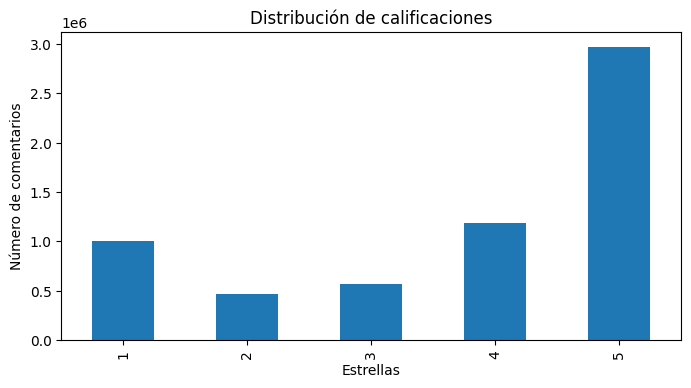

In [26]:
plt.figure(figsize=(8, 4))
df['stars'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de calificaciones')
plt.xlabel('Estrellas')
plt.ylabel('Número de comentarios')
plt.show()

* La distribución en forma de U de las calificaciones por estrellas (con picos en 1, 4 y 5 estrellas) sugiere una tendencia a la polarización en las opiniones de los usuarios.
* Esto podría indicar un sesgo de acción, donde los usuarios están más motivados a escribir reseñas cuando tienen experiencias muy positivas o muy negativas.
* La menor frecuencia de reseñas de 2 y 3 estrellas podría sugerir que las experiencias "promedio" no motivan tanto a los usuarios a dejar reseñas.

# Evolución la frecuencia de reseñas en el tiempo

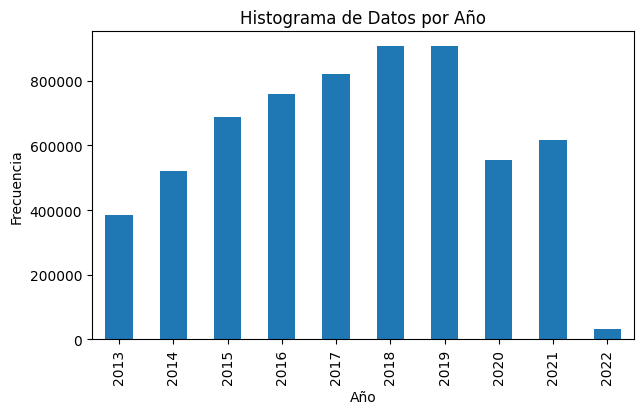

In [27]:
plt.figure(figsize=(7, 4))
df['year'].value_counts().sort_index().plot(kind='bar')
# Añadir títulos y etiquetas
plt.title('Histograma de Datos por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

* El crecimiento constante de datos hasta 2019 sugiere una adopción creciente de la plataforma de reseñas o un aumento en la base de usuarios/negocios.
* La caída abrupta en 2020 y la recuperación gradual posterior indican un fuerte impacto de la pandemia de COVID-19 en la actividad de reseñas, posiblemente reflejando cierres de negocios y cambios en los hábitos de consumo.
* La recuperación post-2020 no alcanza niveles previos, lo que podría indicar cambios duraderos en el comportamiento del consumidor o en el panorama empresarial.

# Promedio de calificaciones con el paso del tiempo

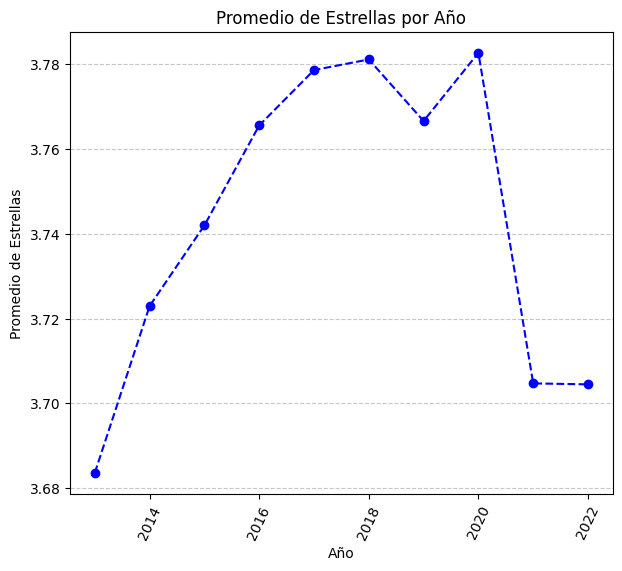

In [28]:
# Calcular el promedio de estrellas por año
average_stars_per_year = df.groupby('year')['stars'].mean().reset_index()

# Crear el gráfico de barras para mostrar el promedio de estrellas por año
plt.figure(figsize=(7, 6))
plt.plot(average_stars_per_year['year'], average_stars_per_year['stars'], linestyle='--', marker='o', color='blue')
plt.xticks(rotation=65)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Promedio de Estrellas')
plt.title('Promedio de Estrellas por Año')

plt.show()

# Patrones de escritura

count   6191627.000
mean        547.826
std         513.866
min           0.000
25%         221.000
50%         390.000
75%         691.000
max        5090.000
Name: longitud_texto, dtype: float64


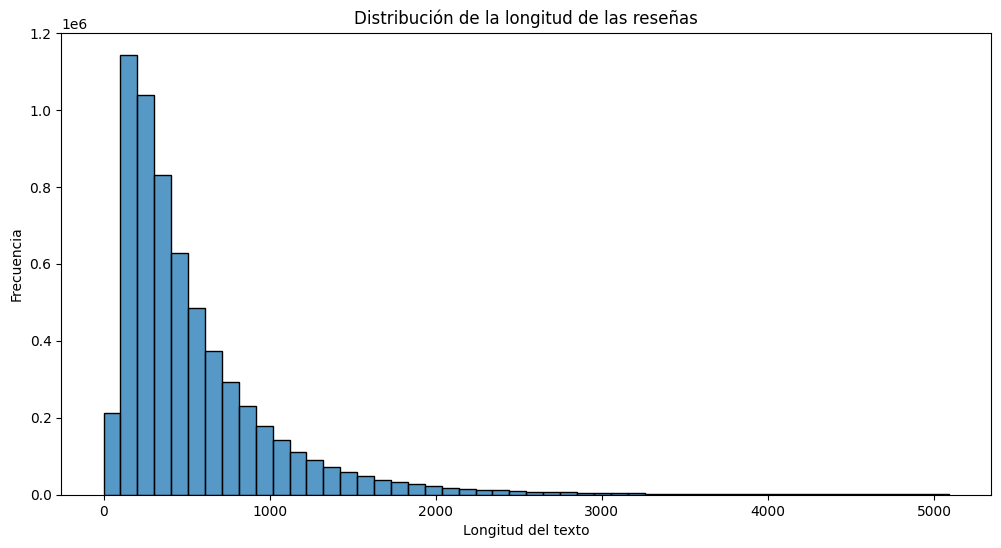

In [29]:
# Manejar valores nulos y convertir a string
df['text'] = df['text'].fillna('')  # Reemplazar NaN con string vacío
df['text'] = df['text'].astype(str)  # Convertir a string

df['longitud_texto'] = df['text'].apply(len)

print(df['longitud_texto'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df['longitud_texto'], bins=50)
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()

* La distribución de la longitud de las reseñas muestra que la mayoría de los usuarios prefieren escribir reseñas cortas y concisas.
* Sin embargo, la larga cola hacia la derecha indica que hay un subconjunto de usuarios muy comprometidos que escriben reseñas extensas y detalladas.
* Esto podría sugerir diferentes niveles de compromiso del usuario, desde evaluaciones rápidas hasta análisis en profundidad